<a href="https://colab.research.google.com/github/zlbembo1/Bases-de-la-programmation_LAB/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%A1%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Путь в бинарном дереве — это последовательность узлов, в которой каждая пара соседних узлов в последовательности имеет соединяющее их ребро . Узел может появиться в последовательности не более одного раза . Обратите внимание, что путь не обязательно должен проходить через корень.

Сумма путей пути — это сумма значений узлов в пути.

Учитывая rootдвоичное дерево, верните максимальную сумму путей любого непустого пути .



Пример 1:
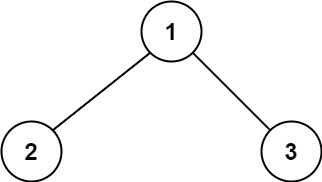

Входные данные: root = [1,2,3]
 Выходные данные: 6
 Объяснение: Оптимальный путь — 2 -> 1 -> 3 с суммой путей 2 + 1 + 3 = 6.
Пример 2:

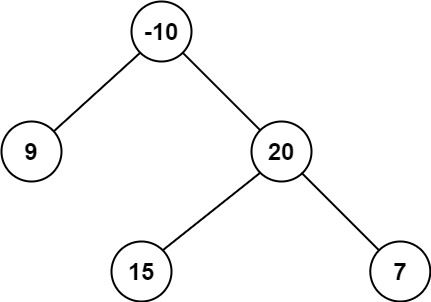
Ввод: root = [-10,9,20,null,null,15,7]
 Выход: 42
 Объяснение: Оптимальный путь — 15 -> 20 -> 7 с суммой путей 15 + 20 + 7 = 42.


Ограничения:

Количество узлов в дереве находится в диапазоне .[1, 3 * 104]
-1000 <= Node.val <= 1000


In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def maxPathSum(self, root):
        def maxPathSumHelper(node):
            nonlocal max_sum
            if not node:
                return 0

            # Рассматриваем суммы только для положительных ветвей
            left_sum = max(maxPathSumHelper(node.left), 0)
            right_sum = max(maxPathSumHelper(node.right), 0)

            # Текущая максимальная сумма для узла
            node_sum = node.val + left_sum + right_sum

            # Обновляем глобальную максимальную сумму
            max_sum = max(max_sum, node_sum)

            # Возвращаем максимальную сумму для родительского узла
            return node.val + max(left_sum, right_sum)

        max_sum = float('-inf')  # Инициализируем глобальную максимальную сумму
        maxPathSumHelper(root)   # Запускаем вспомогательную функцию
        return max_sum

# Примеры использования
# Пример 1
tree1 = TreeNode(1, TreeNode(2), TreeNode(3))
sol = Solution()
print(sol.maxPathSum(tree1))  # Вывод: 6

# Пример 2
tree2 = TreeNode(-10, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7)))
print(sol.maxPathSum(tree2))  # Вывод: 42


6
42


ЗАДАЧА 2

Вам дан целочисленный массив numsи два целых числа indexDiffи valueDiff.

Найдите пару индексов (i, j)такую, что:

i != j,
abs(i - j) <= indexDiff.
abs(nums[i] - nums[j]) <= valueDiff, и
Возврат, trueесли такая пара существует или falseнет .



Пример 1:

Ввод:
```
 nums = [1,2,3,1], indexDiff = 3, valueDiff = 0
 Выход: true
 Объяснение: Мы можем выбрать (i, j) = (0, 3).
```
Мы удовлетворяем трем условиям:
```
i != j --> 0 != 3

abs(i - j) <= indexDiff --> abs(0 - 3) <= 3
abs(nums[i] - nums[j]) <= valueDiff --> abs(1 - 1) <= 0
```
Пример 2:

```
Ввод: nums = [1,5,9,1,5,9], indexDiff = 2, valueDiff = 3

 Вывод: false
```
 Объяснение: перепробовав все возможные пары (i, j), мы не можем удовлетворить три условия, поэтому мы возвращаем ложь.


Ограничения:

```
2 <= nums.length <= 10^5

-10^9 <= nums[i] <= 10^9

1 <= indexDiff <= nums.length

0 <= valueDiff <= 10^9
```

In [2]:
def containsNearbyAlmostDuplicate(nums, indexDiff, valueDiff):
    if len(nums) <= 1 or indexDiff <= 0 or valueDiff < 0:
        return False

    # Создаем словарь для хранения "корзин" значений
    buckets = {}
    bucket_size = valueDiff + 1

    for i, num in enumerate(nums):
        # Находим индекс "корзины", в которую попадает текущее число
        bucket_index = num // bucket_size

        # Проверяем текущую корзину и соседние корзины
        if bucket_index in buckets:
            return True
        if bucket_index - 1 in buckets and num - buckets[bucket_index - 1] <= valueDiff:
            return True
        if bucket_index + 1 in buckets and buckets[bucket_index + 1] - num <= valueDiff:
            return True

        # Добавляем текущее число в текущую корзину
        buckets[bucket_index] = num

        # Удаляем число, которое находится за пределами диапазона indexDiff
        if i >= indexDiff:
            del buckets[nums[i - indexDiff] // bucket_size]

    return False

# Примеры использования
print(containsNearbyAlmostDuplicate([1, 2, 3, 1], 3, 0))  # Вывод: True
print(containsNearbyAlmostDuplicate([1, 5, 9, 1, 5, 9], 2, 3))  # Вывод: False


True
False


ЗАДАЧА 3

Компании

Медиана — это среднее значение в упорядоченном целочисленном списке . Если размер списка четный, среднего значения нет, а медиана — это среднее значение двух средних значений.

Например, для arr = [2,3,4]медиана равна 3.

Например, для arr = [2,3]медиана равна (2 + 3) / 2 = 2.5.

Реализуйте класс MedianFinder:


MedianFinder() инициализирует MedianFinderобъект.

void addNum(int num)добавляет целое число numиз потока данных в структуру данных.

double findMedian()возвращает медиану всех элементов на данный момент. Принимаются ответы в пределах фактического ответа.10-5


Пример 1:

Вход
```
["MedianFinder", "addNum", "addNum", "findMedian", "addNum", "findMedian"]
[[], [1], [2], [], [3], []]
Выход
[ноль, ноль, ноль, 1,5, ноль, 2,0]
```
Объяснение
```
MedianFinder medianFinder = новый MedianFinder();
medianFinder.addNum(1); //объем = [1]
medianFinder.addNum(2); //объем = [1, 2]
medianFinder.findMedian(); // возвращаем 1,5 (т.е. (1 + 2)/2)
medianFinder.addNum(3); // Арр[1, 2, 3]
medianFinder.findMedian(); // возвращаем 2.0

```
Ограничения:
```
-105 <= num <= 105
```
Перед вызовом в структуре данных будет хотя бы один элемент findMedian.
В большинстве случаев вызовы будут осуществляться на адреса и
 ```
.5 * 10^4 addNum findMedian

```
Следовать за:

Если все целые числа из потока находятся в диапазоне [0, 100], как бы вы оптимизировали свое решение?
Если 99%бы все целые числа из потока находились в диапазоне [0, 100], как бы вы оптимизировали свое решение?

In [3]:
import heapq

class MedianFinder:

    def __init__(self):
        # Мин-куча для хранения больших элементов (правая половина)
        self.min_heap = []
        # Макс-куча для хранения маленьких элементов (левая половина)
        self.max_heap = []

    def addNum(self, num: int) -> None:
        # Добавляем элемент в одну из куч
        heapq.heappush(self.max_heap, -num)
        heapq.heappush(self.min_heap, -heapq.heappop(self.max_heap))

        # Балансируем кучи
        if len(self.min_heap) > len(self.max_heap):
            heapq.heappush(self.max_heap, -heapq.heappop(self.min_heap))

    def findMedian(self) -> float:
        # Возвращаем медиану
        if len(self.min_heap) == len(self.max_heap):
            return (self.min_heap[0] - self.max_heap[0]) / 2
        else:
            return -self.max_heap[0]

# Пример использования
medianFinder = MedianFinder()
medianFinder.addNum(1)
medianFinder.addNum(2)
print(medianFinder.findMedian())  # Вывод: 1.5
medianFinder.addNum(3)
print(medianFinder.findMedian())  # Вывод: 2.0


1.5
2


Задача 4
Компании
Загадка с n ферзями — это задача о том, как разместить nферзей на n x nшахматной доске так, чтобы никакие два ферзя не атаковали друг друга.

Учитывая целое число n, верните все различные решения головоломки с n ферзями . Вы можете вернуть ответ в любом порядке .

Каждое решение содержит отдельную конфигурацию доски для размещения n ферзей, где 'Q'и '.'оба обозначают ферзя и пустое место соответственно.



Пример 1:

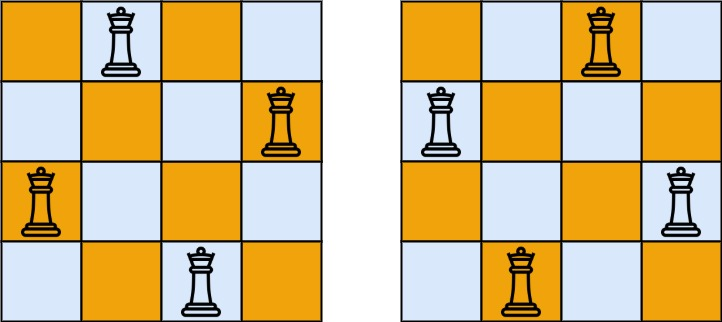
Вход: n = 4
```
 Выход: [[".Q..","...Q","Q...","..Q."],["..Q.","Q.. .","...Q",".Q.."]]
 Пояснение: Существует два различных решения головоломки с четырьмя ферзями, как показано выше.
 ```
Пример 2:
```
Вход: n = 1
 Выход: [["Q"]]
 ```

Ограничения:
```
1 <= n <= 9
```

In [5]:
def solveNQueens(n):
    def is_not_under_attack(row, col):
        for prev_row in range(row):
            if board[prev_row] == col or \
               board[prev_row] - prev_row == col - row or \
               board[prev_row] + prev_row == col + row:
                return False
        return True

    def place_queen(row):
        if row == n:
            result.append([''.join(['Q' if c == col else '.' for c in range(n)]) for col in board])
            return
        for col in range(n):
            if is_not_under_attack(row, col):
                board[row] = col
                place_queen(row + 1)

    result = []
    board = [-1] * n
    place_queen(0)
    return result

# Пример использования
n = 4
print(solveNQueens(n))


[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]


#Задача 5

Задача 5:
Учитывая rows x cols двоичный файл matrix, заполненный символами 0's и 1's, найдите самый большой прямоугольник, содержащий только 1's, и верните его площадь .



Пример 1:

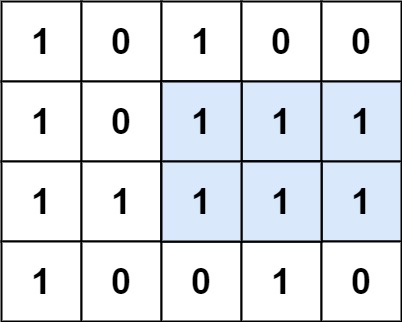
Ввод:
```
матрица = [["1","0","1","0","0"],["1","0","1","1","1"],[ "1","1","1","1","1"],["1","0","0","1","0"]]
 ```
Выход:
```
6.  Пояснение: Максимальное прямоугольник показан на рисунке выше.
 ```
Пример 2:
```
Вход: матрица = [["0"]]
 Выход: 0
Пример 3:
```
```
Входные данные: матрица = [["1"]]
 Выходные данные: 1
 ```

Ограничения:
```
rows == matrix.length
cols == matrix[i].length
1 <= row, cols <= 200
matrix[i][j]есть '0'или '1'.
```

In [6]:
def maximalRectangle(matrix):
    if not matrix:
        return 0

    rows, cols = len(matrix), len(matrix[0])
    height = [0] * cols
    left = [0] * cols
    right = [cols] * cols
    max_area = 0

    for i in range(rows):
        cur_left, cur_right = 0, cols

        # Calculate height
        for j in range(cols):
            if matrix[i][j] == '1':
                height[j] += 1
            else:
                height[j] = 0

        # Calculate left boundary
        for j in range(cols):
            if matrix[i][j] == '1':
                left[j] = max(left[j], cur_left)
            else:
                left[j] = 0
                cur_left = j + 1

        # Calculate right boundary
        for j in range(cols - 1, -1, -1):
            if matrix[i][j] == '1':
                right[j] = min(right[j], cur_right)
            else:
                right[j] = cols
                cur_right = j

        # Calculate area
        for j in range(cols):
            max_area = max(max_area, (right[j] - left[j]) * height[j])

    return max_area

# Пример использования
matrix = [["1", "0", "1", "0", "0"],
          ["1", "0", "1", "1", "1"],
          ["1", "1", "1", "1", "1"],
          ["1", "0", "0", "1", "0"]]

print(maximalRectangle(matrix))


6


#Задача 6

Вам дан массив prices, в котором prices[i]указана цена данной акции на текущий день.ith

Найдите максимальную прибыль, которую вы можете получить. Вы можете совершить не более двух транзакций .

Примечание. Вы не можете совершать несколько транзакций одновременно (т. е. вы должны продать акции, прежде чем купить их снова).



Пример 1:
```
Входные данные: цены = [3,3,5,0,0,3,1,4]
 Выходные данные: 6
 Объяснение: Покупайте в день 4 (цена = 0) и продавайте в день 6 (цена = 3), прибыль = 3- 0 = 3.
Затем купите в день 7 (цена = 1) и продайте в день 8 (цена = 4), прибыль = 4-1 = 3.
```

Пример 2:
```
Входные данные: цены = [1,2,3,4,5]
 Выходные данные: 4
 Объяснение: Покупайте в день 1 (цена = 1) и продавайте в день 5 (цена = 5), прибыль = 5-1 = 4.
Обратите внимание, что вы не можете купить в первый день, купить во второй день и продать позже, поскольку вы совершаете несколько транзакций одновременно. Вы должны продать, прежде чем покупать снова.
```
Пример 3:
```
Входные данные: цены = [7,6,4,3,1]
 Выходные данные: 0
 Объяснение: В этом случае транзакция не выполняется, т.е. максимальная прибыль = 0.

```
Ограничения:
```
1 <= prices.length <= 105
0 <= prices[i] <= 105
```

In [7]:
def maxProfit(prices):
    if not prices:
        return 0

    n = len(prices)
    max_transactions = 2
    dp = [[[0] * 2 for _ in range(max_transactions + 1)] for _ in range(n)]

    for i in range(n):
        for k in range(max_transactions, 0, -1):
            if i == 0:
                dp[i][k][0] = 0
                dp[i][k][1] = -prices[i]
            else:
                dp[i][k][0] = max(dp[i-1][k][0], dp[i-1][k][1] + prices[i])
                dp[i][k][1] = max(dp[i-1][k][1], dp[i-1][k-1][0] - prices[i])

    return dp[n-1][max_transactions][0]

# Пример использования
prices1 = [3, 3, 5, 0, 0, 3, 1, 4]
prices2 = [1, 2, 3, 4, 5]
prices3 = [7, 6, 4, 3, 1]

print(maxProfit(prices1))  # Вывод: 6
print(maxProfit(prices2))  # Вывод: 4
print(maxProfit(prices3))  # Вывод: 0


6
4
0
